In [1]:
# !pip install -U scikit-fuzzy # http://pythonhosted.org/scikit-fuzzy/auto_examples/index.html
# Instalar via terminal

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

/ext/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


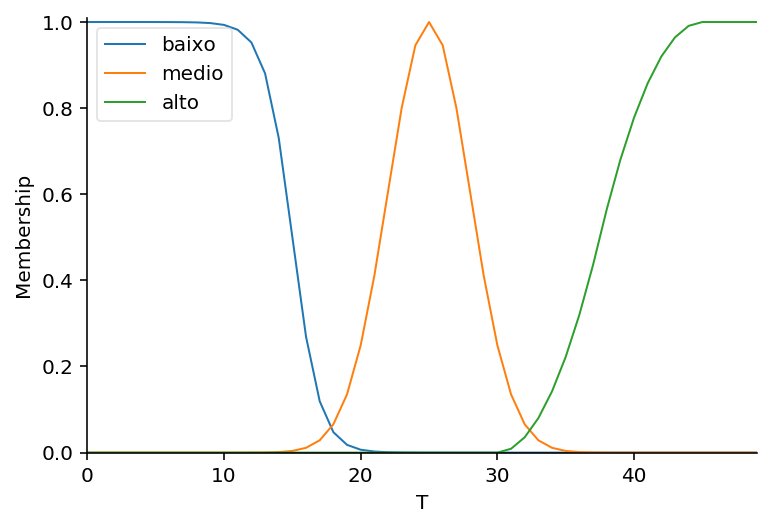

In [3]:
t = ctrl.Antecedent(np.arange(0, 50, 1), 'T')

t['baixo'] = fuzz.sigmf(t.universe, 15, -1)
t['medio'] = fuzz.gaussmf(t.universe, 25, 3)
t['alto']  = fuzz.pimf(t.universe, 30, 45, 50, 75)

t.view()

/ext/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


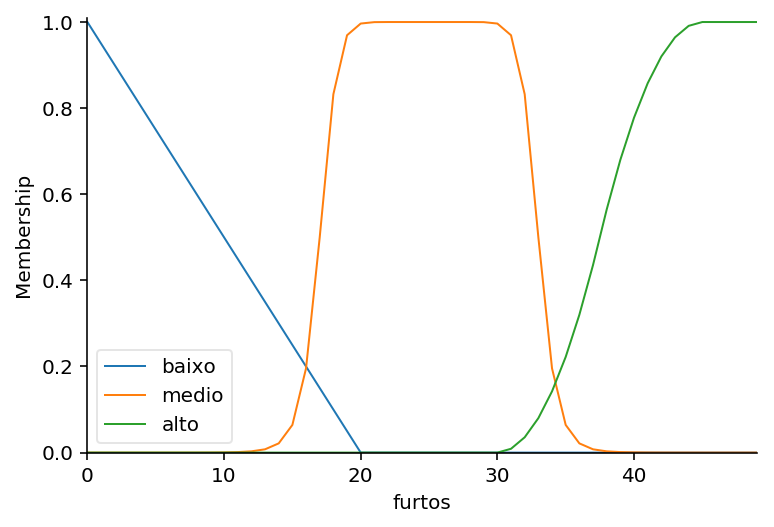

In [4]:
fur = ctrl.Antecedent(np.arange(0, 50, 1), 'furtos')

fur['baixo'] = fuzz.trimf(fur.universe, [0, 0, 20])
fur['medio'] = fuzz.gbellmf(fur.universe, 8, 6, 25)
fur['alto']  = fuzz.pimf(fur.universe, 30, 45, 50, 75)

fur.view()

/ext/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


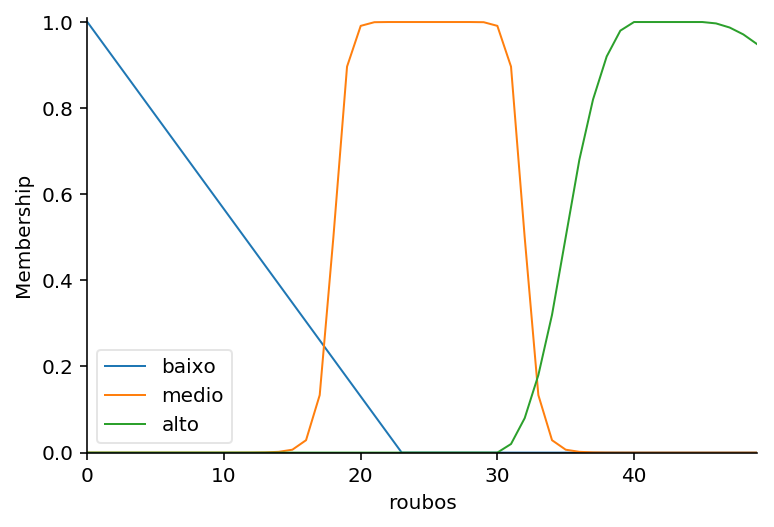

In [5]:
rou = ctrl.Antecedent(np.arange(0, 50, 1), 'roubos')

rou['baixo'] = fuzz.trimf(rou.universe, [0, 0, 23])
rou['medio'] = fuzz.gbellmf(rou.universe, 7, 7, 25)
rou['alto']  = fuzz.pimf(rou.universe, 30, 40, 45, 70)

rou.view()

/ext/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


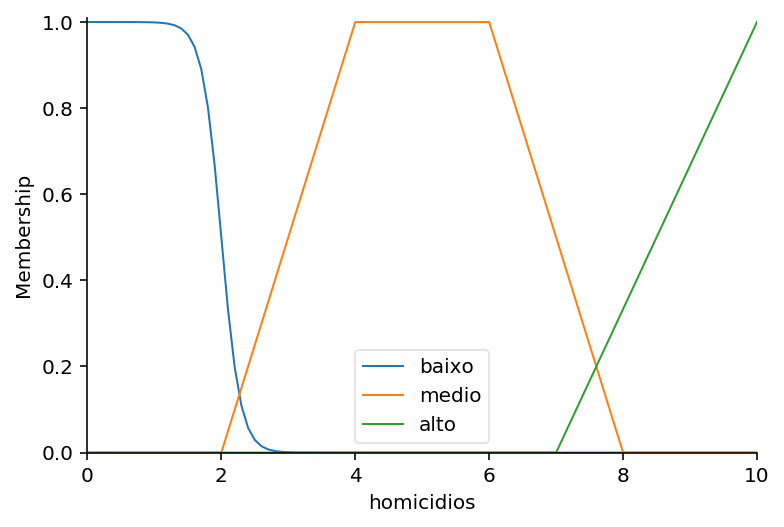

In [6]:
hom = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'homicidios')

hom['baixo'] = fuzz.sigmf(hom.universe, 2, -7)
hom['medio'] = fuzz.trapmf(hom.universe, [2, 4, 6, 8])
hom['alto']  = fuzz.trimf(hom.universe, [7, 10, 10])

hom.view()

/ext/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


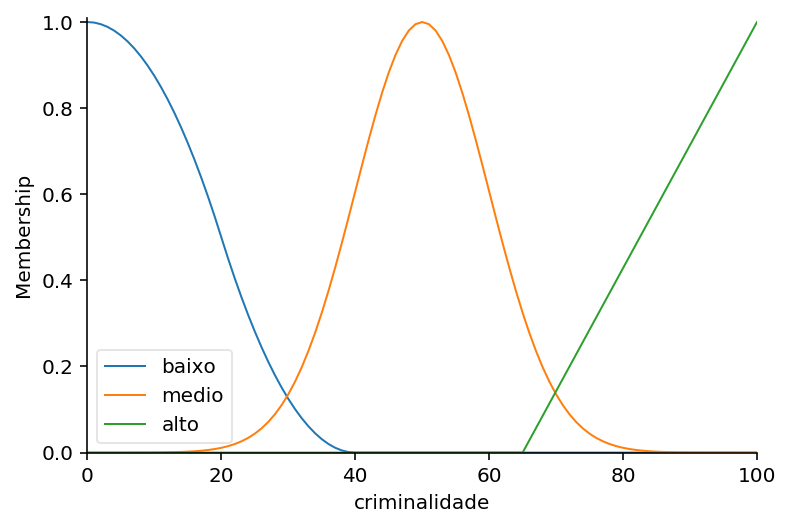

In [7]:
crim = ctrl.Consequent(np.arange(0, 101, 1), 'criminalidade')

crim['baixo'] = fuzz.zmf(crim.universe, 0, 40)
crim['medio'] = fuzz.gaussmf(crim.universe, 50, 10)
crim['alto']  = fuzz.trimf(crim.universe, [65, 100, 100])

crim.view()

/ext/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


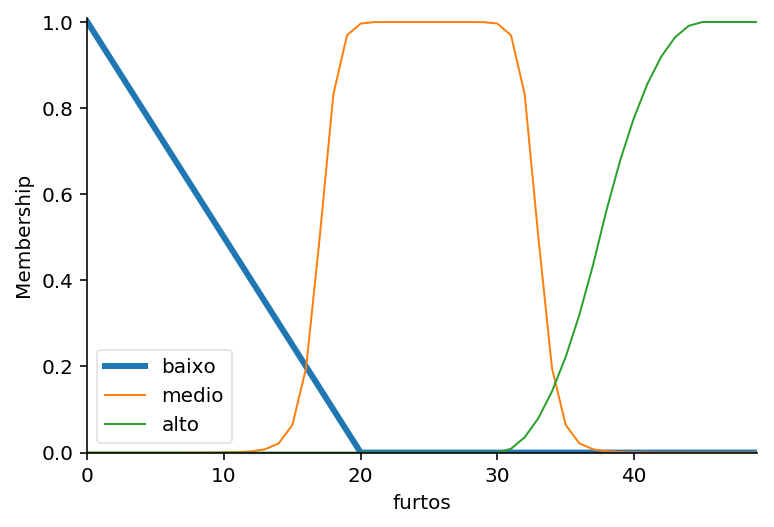

In [8]:
fur['baixo'].view()

In [9]:
regra1 = ctrl.Rule(rou['baixo']  & fur['baixo']  & hom['baixo'],                  crim['baixo'])
regra2 = ctrl.Rule((rou['medio'] | fur['medio']) & hom['baixo'],                  crim['medio'])
regra3 = ctrl.Rule((rou['alto']  | fur['alto'])  | (hom['alto'] | hom['medio']),  crim['alto'])
regra4 = ctrl.Rule(t['alto']     | t['medio'],                                    crim['medio'])

In [10]:
# Cria um sistema de controle e uma simulação
crim_ctrl = ctrl.ControlSystem([regra1, regra2, regra3, regra4])
crim_sim = ctrl.ControlSystemSimulation(crim_ctrl)

In [11]:
# Entrada
crim_sim.input['roubos'] = 10
crim_sim.input['furtos'] = 15
crim_sim.input['homicidios'] = 2
crim_sim.input['T'] = 20

# Calcula
crim_sim.compute()
crim_sim.output

OrderedDict([('criminalidade', 36.003877274233218)])

/ext/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


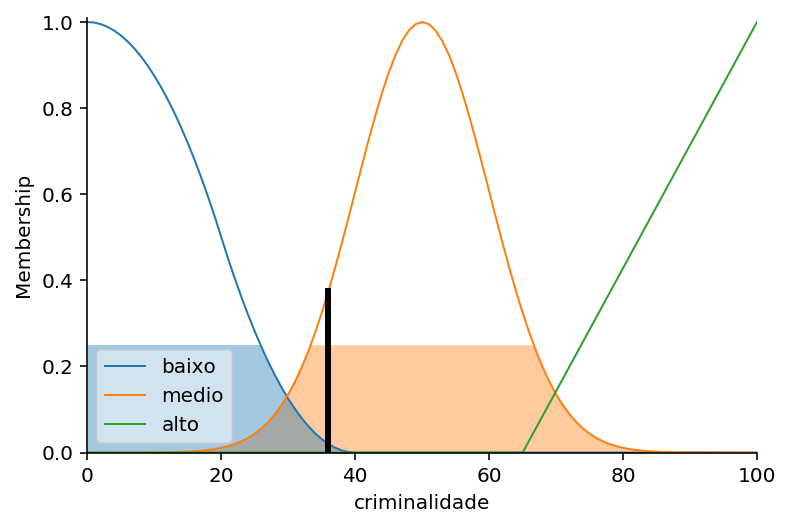

In [12]:
crim.view(sim=crim_sim)

In [13]:
def ic(crim):
   # Entrada
   crim_sim.input['homicidios'] = crim[0]
   crim_sim.input['roubos'] = crim[1]
   crim_sim.input['furtos'] = crim[2]
   crim_sim.input['T'] = crim[3]

   # Calcula
   crim_sim.compute()
   return(crim_sim.output['criminalidade'])

In [14]:
ic([10, 15, 2, 20])

73.847733658811876

In [15]:
import pandas as pd

In [16]:
df = pd.read_excel('Crimes e temperaturas.xlsx', sheet_name='CUIABA')
df.set_index(['anp', 'mes'])

homicidio 
 roubo 
 furto 
 T 
 
 
 anp 
 mes 
 
 
 
 
 
 
 
 
 2016 
 1 
 17 
 999 
 1409 
 27.806452 
 
 
 2 
 27 
 1075 
 1453 
 29.344828 
 
 
 3 
 24 
 1054 
 1340 
 27.806452 
 
 
 4 
 16 
 933 
 1207 
 27.700000 
 
 
 5 
 11 
 960 
 1155 
 25.758065 
 
 
 6 
 15 
 848 
 1059 
 23.766667 
 
 
 7 
 8 
 1129 
 1316 
 25.838710 
 
 
 8 
 21 
 1042 
 1414 
 27.564516 
 
 
 9 
 17 
 952 
 1919 
 26.866667 
 
 
 10 
 20 
 902 
 1739 
 28.354839 
 
 
 11 
 10 
 868 
 1575 
 27.833333 
 
 
 12 
 10 
 660 
 1358 
 27.790323 
 
 
 2017 
 1 
 10 
 707 
 1644 
 27.645161 
 
 
 2 
 7 
 760 
 1518 
 27.392857 
 
 
 3 
 16 
 800 
 1873 
 27.935484 
 
 
 4 
 13 
 735 
 1568 
 27.900000 
 
 
 5 
 14 
 845 
 1659 
 27.596774 
 
 
 6 
 12 
 771 
 1566 
 25.350000 
 
 
 7 
 11 
 636 
 1628 
 24.774194 
 
 
 8 
 11 
 556 
 1644 
 29.177419 
 
 
 9 
 10 
 628 
 1651 
 30.300000 
 
 
 10 
 17 
 618 
 1895 
 29.967742 
 
 
 11 
 10 
 620 
 1093 
 28.516667 
 
 
 12 
 11 
 613 
 1144 
 28.064516

In [17]:
df.loc[0,"T"]

27.806451612903224

In [18]:
aux = df[["homicidio", "roubo", "furto", "T"]]

In [19]:
aux["IC"] = aux.apply(ic, axis = 1)

/ext/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [21]:
aux

homicidio 
 roubo 
 furto 
 T 
 IC 
 
 
 
 
 0 
 17 
 999 
 1409 
 27.806452 
 67.401663 
 
 
 1 
 27 
 1075 
 1453 
 29.344828 
 71.285894 
 
 
 2 
 24 
 1054 
 1340 
 27.806452 
 67.401663 
 
 
 3 
 16 
 933 
 1207 
 27.700000 
 67.226304 
 
 
 4 
 11 
 960 
 1155 
 25.758065 
 65.685827 
 
 
 5 
 15 
 848 
 1059 
 23.766667 
 65.815185 
 
 
 6 
 8 
 1129 
 1316 
 25.838710 
 65.695596 
 
 
 7 
 21 
 1042 
 1414 
 27.564516 
 67.017356 
 
 
 8 
 17 
 952 
 1919 
 26.866667 
 66.201092 
 
 
 9 
 20 
 902 
 1739 
 28.354839 
 68.486624 
 
 
 10 
 10 
 868 
 1575 
 27.833333 
 67.447558 
 
 
 11 
 10 
 660 
 1358 
 27.790323 
 67.374443 
 
 
 12 
 10 
 707 
 1644 
 27.645161 
 67.139843 
 
 
 13 
 7 
 760 
 1518 
 27.392857 
 66.774304 
 
 
 14 
 16 
 800 
 1873 
 27.935484 
 67.628113 
 
 
 15 
 13 
 735 
 1568 
 27.900000 
 67.564272 
 
 
 16 
 14 
 845 
 1659 
 27.596774 
 67.065695 
 
 
 17 
 12 
 771 
 1566 
 25.350000 
 65.645603 
 
 
 18 
 11 
 636 
 1628 
 24.774194 
 65.636955 
 
 
 19 
 11 
 556 
 1644 
 29.177419 
 70.766151 
 
 
 20 
 10 
 628 
 1651 
 30.300000 
 74.915826 
 
 
 21 
 17 
 618 
 1895 
 29.967742 
 73.697143 
 
 
 22 
 10 
 620 
 1093 
 28.516667 
 68.873761 
 
 
 23 
 11 
 613 
 1144 
 28.064516 
 67.871509